In [4]:
print("hello, world")

hello, world


In [5]:
import akshare as ak

In [6]:
sw_index_spot_df = ak.sw_index_spot()
print(sw_index_spot_df)

      指数代码  指数名称       昨收盘       今开盘              成交额       最高价       最低价  \
0   801010  农林牧渔   3913.10   3962.94   47297600398.00   4190.00   3962.94   
1   801020    采掘   2481.63   2470.58   16186725926.00   2537.18   2464.23   
2   801030    化工   3649.16   3668.75   65706322589.00   3744.00   3656.65   
3   801040    钢铁   2237.34   2242.29    7344778945.00   2287.80   2231.62   
4   801050  有色金属   4094.32   4143.93   70756329178.00   4342.20   4143.93   
5   801080    电子   4734.59   4741.04  117712312511.00   4815.08   4715.33   
6   801110  家用电器  10197.01  10239.28   19517772435.00  10428.24  10239.28   
7   801120  食品饮料  28773.45  28825.21   71616472864.00  29652.72  28822.22   
8   801130  纺织服装   1783.63   1776.78    6848679144.00   1778.58   1766.93   
9   801140  轻工制造   2605.76   2610.79   15886595093.00   2648.02   2610.16   
10  801150  医药生物  12077.43  12045.12   97607793970.00  12139.96  11973.68   
11  801160  公用事业   2000.65   2000.00   27522653366.00   2012.03   1993.51   

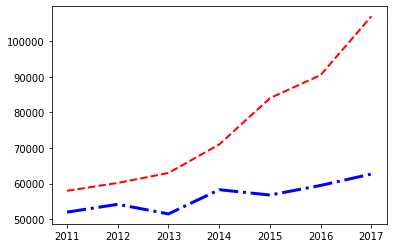

In [2]:
import matplotlib.pyplot as plt

x_data = ['2011','2012','2013','2014','2015','2016','2017']
y_data = [58000,60200,63000,71000,84000,90500,107000]
y_data2 = [52000,54200,51500,58300,56800,59500,62700]

plt.plot(x_data,y_data,color='red',linewidth=2.0,linestyle='--')
plt.plot(x_data,y_data2,color='blue',linewidth=3.0,linestyle='-.')
plt.show()

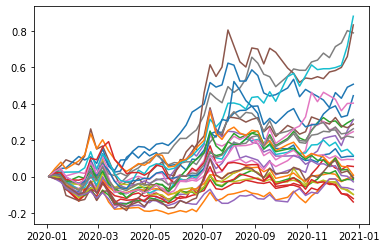

In [27]:
import akshare as ak

def draw_index(code):
    sw_index_df = ak.sw_index_daily_indicator(index_code=code,start_date="2020-01-01", end_date="2020-12-31", data_type="Week")
    init_price = float(sw_index_df.iloc[-1].at['close'])
    sw_index_df['relate_price'] = sw_index_df['close'].astype('float').apply(lambda x: (x-init_price)/init_price)
    plt.plot(sw_index_df['date'], sw_index_df['relate_price'])

sw_index_spot_df = ak.sw_index_spot()

for code in sw_index_spot_df['指数代码']:
    draw_index(code)

plt.show()
